[View in Colaboratory](https://colab.research.google.com/github/Vprashant/Analytics/blob/master/Alphabet.ipynb)

In [0]:
#!apt install libnvrtc8.0
!pip install -q python-mnist


In [0]:
!mkdir data

In [0]:
#!pip install python-mnist

from __future__ import print_function
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from mnist import MNIST
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 26
epochs = 10

In [0]:
img_rows, img_cols = 28, 28

emnist_data = MNIST(path= './data', return_type='numpy')
emnist_data.select_emnist('letters')
X, y = emnist_data.load_training()

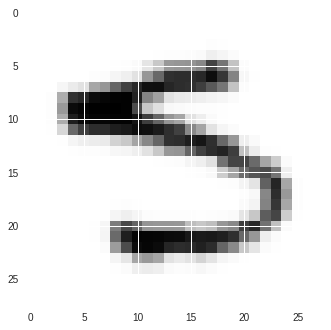

In [0]:
from matplotlib import pyplot as plt
X = X.reshape(124800, 28, 28)
y = y.reshape(124800, 1)


y = y-1

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=111)

g = plt.imshow(x_train[782])
plt.show(g)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)



x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Rescale the image values to [0, 1]
x_train /= 255
x_test /= 255



In [0]:
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import utils as np_utils

# Convert class vectors to binary class matrices
nb_classes = 26
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

# Set the CNN Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Comple the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Save the model weights for future reference
model_json = model.to_json()
with open("New_Alpha_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("New_Alpha_model.h5")
print("Saved model to disk")

Train on 93600 samples, validate on 31200 samples
Epoch 1/10
93600/93600 [==============================] - 19s 202us/step - loss: 0.8712 - acc: 0.7354 - val_loss: 0.3353 - val_acc: 0.8924
Epoch 2/10
93600/93600 [==============================] - 17s 183us/step - loss: 0.4455 - acc: 0.8604 - val_loss: 0.2755 - val_acc: 0.9121
Epoch 3/10
93600/93600 [==============================] - 17s 183us/step - loss: 0.3732 - acc: 0.8831 - val_loss: 0.2537 - val_acc: 0.9182
Epoch 4/10
93600/93600 [==============================] - 17s 186us/step - loss: 0.3347 - acc: 0.8932 - val_loss: 0.2604 - val_acc: 0.9133
Epoch 5/10
93600/93600 [==============================] - 17s 181us/step - loss: 0.3059 - acc: 0.9024 - val_loss: 0.2478 - val_acc: 0.9237
Epoch 6/10
93600/93600 [==============================] - 17s 186us/step - loss: 0.2905 - acc: 0.9061 - val_loss: 0.2301 - val_acc: 0.9246
Epoch 7/10
93600/93600 [==============================] - 17s 181us/step - loss: 0.2715 - acc: 0.9121 - val_loss: 0.

In [0]:
acc = model.evaluate(x_test, y_test)

31200/31200 [==============================] - 5s 173us/step


In [0]:
print('accuracy :{} ,  Loss :{}'.format(acc[1],acc[0]))

accuracy :0.9324038461538462 ,  Loss :0.20505691017382421
